In [1]:
import pandas as pd
from plotnine import *

In [2]:
df = pd.read_csv("../sabio597.csv")

In [3]:
df.head()

,id,value,unit
0,KmS_SPC_56_Cell,0.036000,"CustomUnit(""M"")"
1,KiQ_SPC_38_Cell,0.000056,"CustomUnit(""M"")"
2,Vmax_KmS_SPC_56_Cell,0.003667,"CustomUnit(""katMwedgeonegwedgeone"")"
3,KiA_SPC_37_Cell,0.002300,"CustomUnit(""M"")"
4,KmA_SPC_37_Cell,0.000710,"CustomUnit(""M"")"


In [4]:
kcats = df.loc[df.id.str.contains("kcat") & ~df.id.str.contains("Km") & (df.unit != 'CustomUnit("")'), :]
kcats["high"] = kcats.value > 50

/tmp/ipykernel_69587/3981062449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:ylabel='Density'>

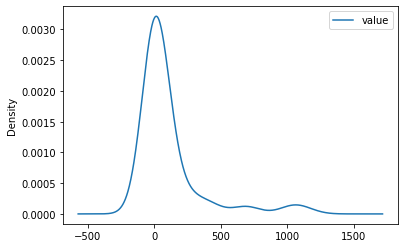

In [5]:
kcats.plot.kde("scott")

In [6]:
kms = df.loc[df.id.str.contains("Km") & ~df.id.str.contains("kcat") & ~df.id.str.contains("Vm"), :]

In [12]:
kms.groupby("id").count()

,value,unit
id,,
Kcat_Km_SPC_56_Cell,4,4
KmADHACE_SPC_1292_cytosol,1,1
KmADHETOH_SPC_56_cytosol,1,1
KmADHNADH_SPC_38_cytosol,1,1
KmADHNAD_SPC_37_cytosol,1,1
KmA_SPC_37_Cell,4,4
KmA_SPC_38_Cell,3,3
KmB_SPC_56_Cell,1,1
KmS_SPC_1292_Cell,3,3


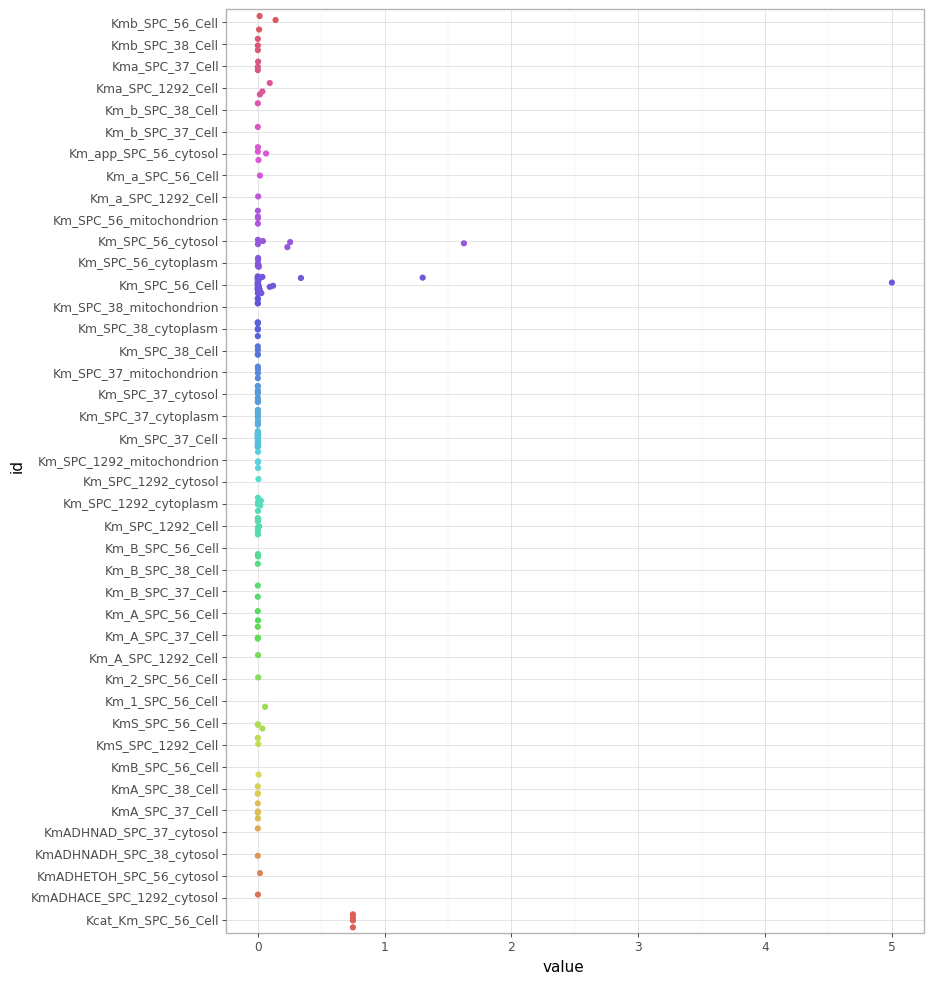

<ggplot: (8784473973131)>

In [25]:
(ggplot(kms, aes("value", "id", color="id")) +
    geom_jitter() +
    theme_light() +
    theme(figure_size=(9, 12)) +
    scale_color_discrete(guide=False)
)

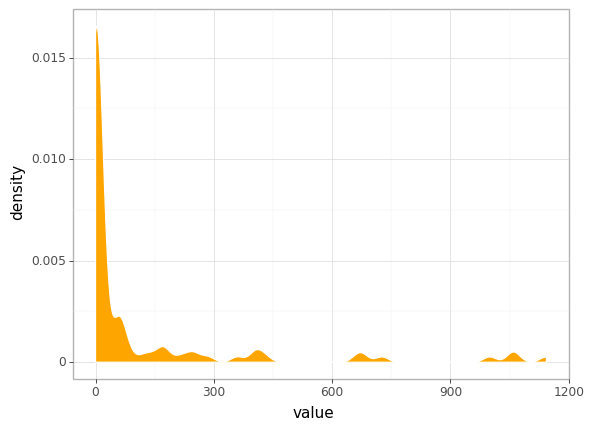

<ggplot: (8784471972627)>

In [15]:
(ggplot(kcats, aes("value")) +
    geom_density(fill="orange", color="white") +
    theme_light()

)

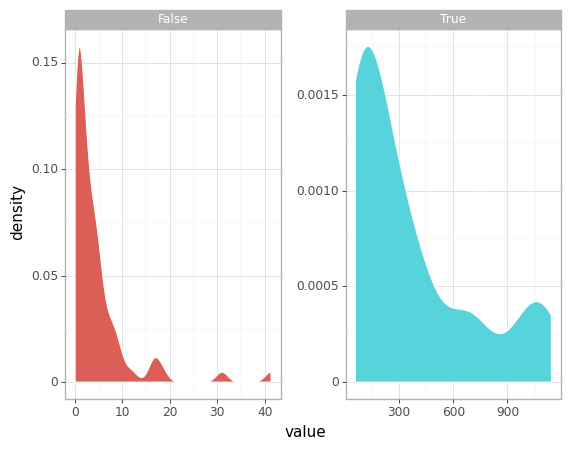

<ggplot: (8784471009256)>

In [17]:
(ggplot(kcats, aes("value", fill="high")) +
    geom_density(color="white") +
    facet_wrap("~ high", scales="free") +
    theme_light() +
    theme(subplots_adjust={'wspace': 0.3}) +
    scale_fill_discrete(guide=False)
)